# Install Packages

In [ ]:
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.3/269.3 kB 32.4 MB/s eta 0:00:00


In [ ]:
from datasets import list_datasets

# Import Libraries

In [ ]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import string
import tensorflow.keras as keras
import torch

from google.colab import drive
from wordcloud import WordCloud

# Mount Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/My Drive/University/Spring 2023/Advanced Machine Learning/Project/themes"

# Analyze

In [ ]:
from datasets import load_dataset
data_files = {"train": f"{data_path}/train.csv", "test": f"{data_path}/test.csv"}

lyrics = load_dataset("csv", data_files=data_files, names=['artist', 'theme', 'lyrics', 'label'])

  0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
lyrics

DatasetDict({
    train: Dataset({
        features: ['artist', 'theme', 'lyrics', 'label'],
        num_rows: 1950
    })
    test: Dataset({
        features: ['artist', 'theme', 'lyrics', 'label'],
        num_rows: 488
    })
})

In [ ]:
train_ds = lyrics["train"]
train_ds.column_names

['artist', 'theme', 'lyrics', 'label']

In [ ]:
train_ds[0]

{'artist': 'Dean Lewis',
 'theme': 'sad',
 'lyrics': 'Early mornin\' there\'s a message on my phone\nIt\'s my mother saying "Darlin\', please come home"\nI fear the worst, but how could you leave us all behind?\nThere\'s so much to say, but there\'s so little time\n\n\nSo how do I say goodbye\nTo someone who\'s been with me for my whole damn life?\nYou gave me my name and the colour of your eyes\nI see your face when I look at mine\nSo how do I, how do I, how do I say goodbye?\n\nWhen I couldn\'t, you always saw the best in me\nRight or wrong, you were always on my side\nBut I\'m scared of what life without you\'s like\nAnd I saw the way she looked into your eyes\n\n\nAnd I promise, if you go\nI will make sure she\'s alright\n\n\nSo how do I say goodbye\nTo someone who\'s been with me for my whole damn life?\nYou gave me my name and the colour of your eyes\nI see your face when I look at mine\nSo how do I, how do I, how do I say goodbye?\n\n\nAnd there\'s no way you could ever let me d

In [ ]:
train_ds.features

{'artist': Value(dtype='string', id=None),
 'theme': Value(dtype='string', id=None),
 'lyrics': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None)}

In [ ]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
def tokenize(batch):
  return tokenizer(batch["lyrics"], padding=True, truncation=True)

In [ ]:
print(tokenize(lyrics["train"][:2]))

{'input_ids': [[101, 2220, 22822, 11483, 1005, 2045, 1005, 1055, 1037, 4471, 2006, 2026, 3042, 2009, 1005, 1055, 2026, 2388, 3038, 1000, 18243, 4115, 1005, 1010, 3531, 2272, 2188, 1000, 1045, 3571, 1996, 5409, 1010, 2021, 2129, 2071, 2017, 2681, 2149, 2035, 2369, 1029, 2045, 1005, 1055, 2061, 2172, 2000, 2360, 1010, 2021, 2045, 1005, 1055, 2061, 2210, 2051, 2061, 2129, 2079, 1045, 2360, 9119, 2000, 2619, 2040, 1005, 1055, 2042, 2007, 2033, 2005, 2026, 2878, 4365, 2166, 1029, 2017, 2435, 2033, 2026, 2171, 1998, 1996, 6120, 1997, 2115, 2159, 1045, 2156, 2115, 2227, 2043, 1045, 2298, 2012, 3067, 2061, 2129, 2079, 1045, 1010, 2129, 2079, 1045, 1010, 2129, 2079, 1045, 2360, 9119, 1029, 2043, 1045, 2481, 1005, 1056, 1010, 2017, 2467, 2387, 1996, 2190, 1999, 2033, 2157, 2030, 3308, 1010, 2017, 2020, 2467, 2006, 2026, 2217, 2021, 1045, 1005, 1049, 6015, 1997, 2054, 2166, 2302, 2017, 1005, 1055, 2066, 1998, 1045, 2387, 1996, 2126, 2016, 2246, 2046, 2115, 2159, 1998, 1045, 4872, 1010, 2065, 2017

In [ ]:
lyrics_encoded = lyrics.map(tokenize, batched=True, batch_size=None)

In [ ]:
print(lyrics_encoded["train"].column_names)

['artist', 'theme', 'lyrics', 'label', 'input_ids', 'attention_mask']


In [ ]:
from transformers import AutoModel

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
def extract_hidden_states(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

In [ ]:
lyrics_encoded.set_format("torch",
                          columns=["input_ids", "attention_mask", "label"])

In [ ]:
lyrics_hidden = lyrics_encoded.map(extract_hidden_states, batched=True, batch_size=100)

In [ ]:
lyrics_hidden["train"].column_names

['artist',
 'theme',
 'lyrics',
 'label',
 'input_ids',
 'attention_mask',
 'hidden_state']

In [ ]:
X_train = np.array(lyrics_hidden["train"]["hidden_state"])
X_test = np.array(lyrics_hidden["test"]["hidden_state"])
y_train = np.array(lyrics_hidden["train"]["label"])
y_test = np.array(lyrics_hidden["test"]["label"])

In [ ]:
X_train.shape, X_test.shape

((1950, 768), (488, 768))

In [ ]:
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)

df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

,X,Y,label
0,6.588749,5.072366,0
1,2.004171,0.464289,1
2,8.054673,3.432134,0
3,7.391015,5.947169,0
4,3.135375,1.119874,1


<Axes: xlabel='X', ylabel='Y'>

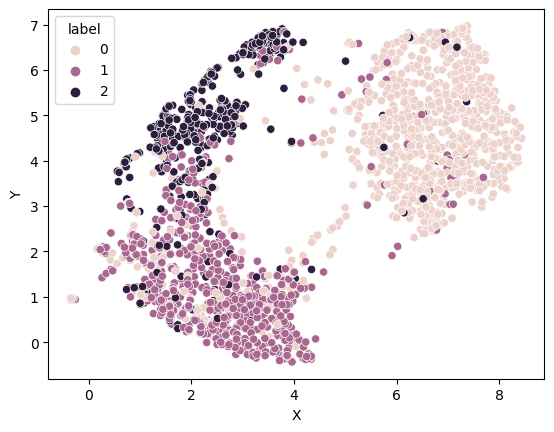

In [ ]:
sns.scatterplot(x='X', y='Y', hue='label', data=df_emb)

In [ ]:
labels = ["sad", "good-vibes", "aggressive"]

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.4918032786885246

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized Confusion Matrix")
  plt.show()


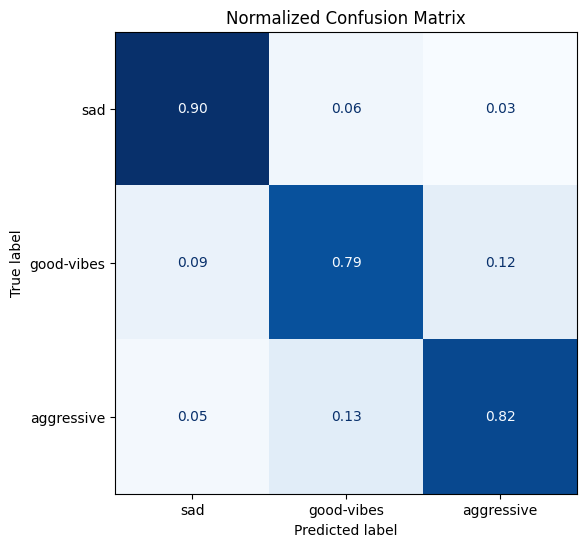

In [ ]:
y_preds = lr_clf.predict(X_test)
plot_confusion_matrix(y_preds, y_test, labels)

In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 3
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device)
         )

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'classifier.weight', 'classifi

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {"accuracy": acc, "f1": f1}

In [ ]:
from huggingface_hub import notebook_login

In [ ]:
notebook_login()

Token is valid.
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
from transformers import Trainer, TrainingArguments

batch_size = 16
logging_steps = len(lyrics_encoded["train"])
model_name = f"{model_ckpt}-analysis"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=5,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error"
                                  )

In [ ]:
trainer = Trainer(model=model, 
                  args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=lyrics_encoded["train"],
                  eval_dataset=lyrics_encoded["test"],
                  tokenizer=tokenizer
                  )

/content/distilbert-base-uncased-analysis is already a clone of https://huggingface.co/felakoum/distilbert-base-uncased-analysis. Make sure you pull the latest changes with `repo.git_pull()`.


In [ ]:
history = trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.485095,0.885246,0.883917
2,No log,0.491719,0.897541,0.896955
3,No log,0.533590,0.893443,0.893522
4,No log,0.521404,0.889344,0.888922
5,No log,0.538899,0.891393,0.891618


In [ ]:
print(history)

TrainOutput(global_step=610, training_loss=0.08437698864545978, metrics={'train_runtime': 521.2744, 'train_samples_per_second': 18.704, 'train_steps_per_second': 1.17, 'total_flos': 1291580169984000.0, 'train_loss': 0.08437698864545978, 'epoch': 5.0})


In [ ]:
preds_output = trainer.predict(lyrics_encoded["test"])

In [ ]:
preds_output.metrics

{'test_loss': 0.5388990044593811,
 'test_accuracy': 0.8913934426229508,
 'test_f1': 0.8916178769055335,
 'test_runtime': 8.7762,
 'test_samples_per_second': 55.605,
 'test_steps_per_second': 3.532}

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis=1)

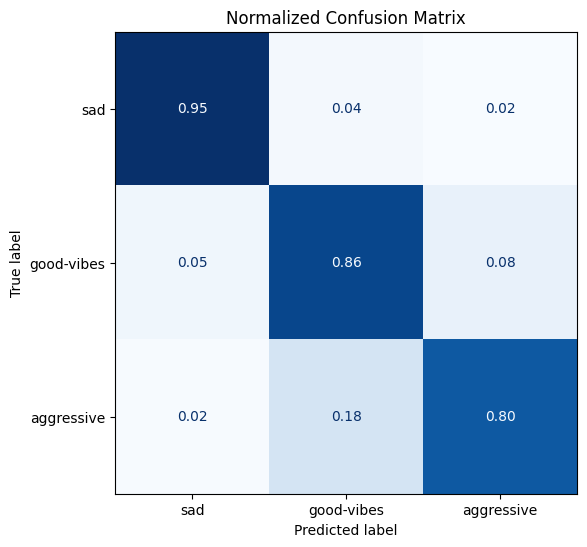

In [ ]:
plot_confusion_matrix(y_preds, y_test, labels)

# Error Analysis

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
    pred_label = torch.argmax(output.logits, axis=-1)
    loss = cross_entropy(output.logits, batch["label"].to(device), reduction="none")

    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()
            }

In [ ]:
lyrics_encoded.set_format("torch",
                          columns=["input_ids", "attention_mask", "label"]
                          )

In [ ]:
lyrics_encoded["test"] = lyrics_encoded["test"].map(
    forward_pass_with_label, batched=True, batch_size=16
)

Map:   0%|          | 0/488 [00:00<?, ? examples/s]

In [ ]:
# define a function to transform label values to string
def label_to_string(label):
    if label == 0:
        return 'sad'
    elif label == 1:
        return 'good-vibes'
    elif label == 2:
        return 'aggressive'
    else:
        return 'unknown'

In [ ]:
lyrics_encoded.set_format("pandas")
cols = ["lyrics", "label", "predicted_label", "loss"]
df_test = lyrics_encoded["test"][:][cols]
df_test["label"] = df_test["label"].apply(label_to_string)
df_test["predicted_label"] = df_test["predicted_label"].apply(label_to_string)

In [ ]:
df_test.sort_values("loss", ascending=False).head(10)

,lyrics,label,predicted_label,loss
161,"Take a seat\nRight over there, sat on the stai...",good-vibes,sad,8.368045
207,Written in these walls are the stories that I ...,good-vibes,sad,8.306932
150,"No more hesitating\nBut my body is shaking, no...",good-vibes,sad,8.276281
248,Can we pretend that airplanes in the night sky...,good-vibes,sad,8.153495
113,I wish I knew you wanted me\nI wish I knew\nI ...,good-vibes,sad,7.913912
426,"If I don't say this now, I will surely break\n...",sad,good-vibes,7.621877
126,Trying to hold a love that wants to go\nIs lik...,sad,good-vibes,7.465170
344,"Purple hat, cheetah print\nDancing on the peop...",aggressive,good-vibes,6.758695
340,"Hey, woman\nHey, woman\n\n[Chorus]\nWoman\nLet...",aggressive,good-vibes,6.740811
262,Pullin' out the coupe at the lot\nTold 'em fuc...,good-vibes,aggressive,6.711285


In [ ]:
df_test.sort_values("loss", ascending=True).head(10)

,lyrics,label,predicted_label,loss
413,Day breaks and when I turn\nYou're not on my p...,sad,sad,0.000396
34,And all I remember is your back\nWalkin' towar...,sad,sad,0.000398
317,Your heartbeat bleeds on the front steps\nI'm ...,sad,sad,0.000399
449,Taking it slowly\nI'm afraid to be lonely\nNob...,sad,sad,0.000399
243,You'll always be my number one\nA whole lot mo...,sad,sad,0.000400
145,Every time we drew our lines\nThey grew legs a...,sad,sad,0.000400
225,Could have been my happy ever after\nLiving li...,sad,sad,0.000400
26,"I'm in the kitchen, 20 to midnight\nI just got...",sad,sad,0.000401
420,I didn't mean to hurt you\nSo why’d I let you ...,sad,sad,0.000402
472,Come home early after class\nDon't be hanging ...,sad,sad,0.000403


# Push the model

In [ ]:
trainer.push_to_hub(commit_message="Training completed!")

Upload file pytorch_model.bin:   0%|          | 1.00/255M [00:00<?, ?B/s]

Upload file runs/Apr22_17-49-44_472d71d00249/events.out.tfevents.1682185834.472d71d00249.18343.4:   0%|       …

To https://huggingface.co/felakoum/distilbert-base-uncased-analysis
   c256cff..259a99c  main -> main

   c256cff..259a99c  main -> main

To https://huggingface.co/felakoum/distilbert-base-uncased-analysis
   259a99c..a598e08  main -> main

   259a99c..a598e08  main -> main



'https://huggingface.co/felakoum/distilbert-base-uncased-analysis/commit/259a99c65ba558115298520af69a13186816b407'

# Try the model

In [ ]:
from transformers import pipeline

model_id = "felakoum/distilbert-base-uncased-analysis"
classifier = pipeline("text-classification", model=model_id)